## Social Media Competition with Network Externalities

|Names           | ANR      | 
| -------------  |:--------:| 
| Maria Iancheva | 398254  
| Tim Gijsbers   | 262041

### Introduction

In this notebook we show the application of a simple Cournot Model with indirect network effects to the Social Media Market. We use Python to analyse and graphycally represent the model. For this analysis we adopt the developed model by professors Jens Prüfer and Cedric Argenton in the reaserch paper: ["Search Engine Competition with Network Externalities."](https://jensprufer.files.wordpress.com/2014/08/argenton-prufer-search-engine-competition_jcle.pdf) In their research, the authors developed a model for search engine competition taking into account network externalities and show the development of market shares for each player.  

### Research Question

Can the search engine model be used to predict competition in the Social Media market, by comparing market shares of the biggest competitiors from 2011 onwards?




### Motivation

After taking the Seminar on Innovation & Networks taught by professor Prufer and professor Willems, we were intrigued by the model on of search engine competition with indirect network effects. The model's prediction of a market leader (Google) increasing its market shares and driving the smallest player out of the market (Bing) coinside with reality. 
In the search engine market, the long-term stable outcome will be one monopolist, due to heavy network effects of this market.
Knowig that in the Social Media market MySpace was pushed out of the market by Facebook, we wanted to check whether the model could help us explain this event. 


### Method 

Firstly, we replicate graphically the Triopoly Search Engine Model with Network Externalities then we show the Duopoly case and lastly we caliberate the parameters to fit the Social Media Market and show that in this case the model again predicts tipping of the market. 

### Assumptions

* We use the profit maximazation functions for Triopoly and Duopoly examples explained in ["Search Engine Competition with Network Externalities"](https://jensprufer.files.wordpress.com/2014/08/argenton-prufer-search-engine-competition_jcle.pdf).
&nbsp;

    * In the Triopoly case, each company i maximizes the following function:
&nbsp;

     $$ \pi_i = \frac{x_i p}{x_1+x_2+x_3} - \frac {x_i}{N_i} - F $$
&nbsp;     

    * In the Duopoly case, each company i maximizes the following function: 
&nbsp;

     $$ \pi_i = \frac{x_i p}{x_1+x_2} - \frac {x_i}{N_i} - F $$
     
* The calcutaions are presented in the Appendix of the article.

The following assumptions are stated in the article:
* Competition is modelled as a contest among search engines with simultaneous bids $x_i$, where $x_i$ is firm i's search quality.
* In triopoly case n=3 and duopoly n=2
* Market share for firm i is:
$$ D_i = \frac{x_i}{\sum_{j=1}^{n}x_j} $$
* Production of quality $x_i$ comes at a cost: $$ C(x_i) = \frac{x_i}{N_i} $$
&nbsp;

* where $N_i$ is the installed base (the amount of previous search queries run on i.) $N_1$>$N_2$>$N_3$ = 1


### Execution 

#### Importing Libraries


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import *
from scipy import arange

### Triopoly case

Using the equations from the Appendix of the artcile for the Triopoly case, where each company maximizes the following function:

$$ \pi_i = \frac{x_i p}{x_1+x_2+x_3} - \frac {x_i}{N_i} - F $$
We plug in the following functions for the quality $x_i$:

$$ x_1 = \sqrt{\frac{p^2 N_1^2 N_2^2}{(N_2+N_1(1+N_2))^2)}}- \frac{4pN_1 N_2^2}{(N_2+ N_1(1+N_2))^2} $$

For Firm 2:
$$ x_2 = \frac {2pN_1 N_2 (N_1 (N_2 - 1) + N_2}{(N_2 + N_1(1+N_2)^2}$$

For Firm 3:
$$ x_3 = \frac {2pN_1 N_2 (-N_1 (N_2 - 1) + N_2}{(N_2 + N_1(1+N_2)^2}$$

And for the Market share for each company $D_i$:

$$ D_1 = 1 - \frac {2N_2}{N_2 + N_1(1+ N_2)}$$

For Firm 2:
$$ D_2 = 1 - \frac {2N_1}{N_2 + N_1(1+ N_2)}$$

For Firm 3:
$$ D_3 = \frac {N_1(1-N_2) + N_2}{N_2 + N_1(1+ N_2)}$$

The authors gave values to the parameters so that we can graph the quality and market shares and how they change with $N_1$: p=1 and $N_2$ = 1.2.

In [26]:
p=1.0
N2 = 1.2

def triopoly1 (N1):
    return sqrt(((p**2)*(N1**2)*(N2**2))/((N2+N1*(1+N2))**2))- (4*p*N1*(N2**2))/((N2+ N1*(1+N2))**2)

def triopoly2 (N1):
    return (2*p*N1*N2*(N1*(N2-1)+N2)) / ((N2+N1*(1+N2))**2)

def triopoly3 (N1):
    return (2*p*N1*N2*(-N1*(N2-1)+N2)) / ((N2+N1*(1+N2))**2)

def triopolyMS1 (N1):
    return 1-((2*N2)/(N2+N1*(1+N2)))

def triopolyMS2 (N1):
    return 1-((2*N1)/(N2+N1*(1+N2)))

def triopolyMS3 (N1):
    return (N1*(1-N2) +N2)/(N2+N1*(1+N2))

In order to graph how $x_i$ and $D_i$ change with $N_1$, we create a range for x and $N_1$ values:

In [27]:
range_N1 = arange(1.2,10,1)

range_x = arange(-1.0,1,0.01)
range_triopoly1 = [triopoly1(N1) for N1 in range_N1]
range_triopoly2 = [triopoly2(N1) for N1 in range_N1]
range_triopoly3 = [triopoly3(N1) for N1 in range_N1]
range_triopolyMS1 = [triopolyMS1(N1) for N1 in range_N1]
range_triopolyMS2 = [triopolyMS2(N1) for N1 in range_N1]
range_triopolyMS3 = [triopolyMS3(N1) for N1 in range_N1]


Then we plot the graph of quality and how quality changes with the installed base $N_1$.

(-0.5, 1)

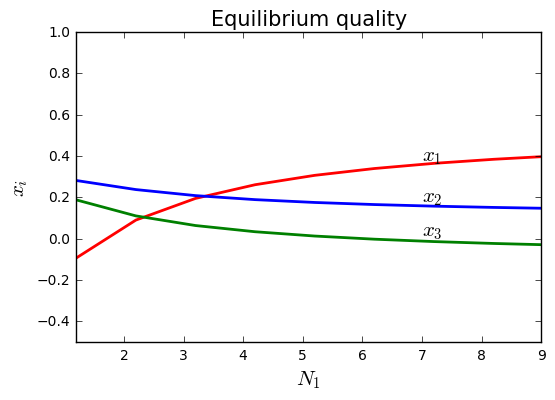

In [28]:
plt.clf()
plt.plot(range_N1, range_triopoly1,'-', color = 'r', linewidth = 2)
plt.plot(range_N1, range_triopoly2,'-', color = 'b', linewidth = 2)
plt.plot(range_N1, range_triopoly3,'-', color = 'g', linewidth = 2)
plt.title("Equilibrium quality",fontsize = 15)
plt.xlabel("$N_1$",fontsize = 15)
plt.ylabel("$x_i$",fontsize = 15,rotation = 90)

plt.annotate('$x_1$', xy=(7,triopoly1(8)),  xycoords='data', size = 15
             )
plt.annotate('$x_2$', xy=(7,triopoly2(5)),  xycoords='data', size = 15
             )
plt.annotate('$x_3$', xy=(7,triopoly3(5)),  xycoords='data', size = 15
             )            
              

plt.xlim(1.2,9)
plt.ylim(-0.5,1,0.1)

Then we plot the market share $D_i$ against $N_1$. The graph represented here replicates Figure 1 from the article and shows how the Market is tipping. Firm 1, which starts the highest installed base is progresiely gaining market shares, whereas firm 3 market share falls negative with the increase of $N_1$. The following graph "Equilibrium Market Share" shows  the conclusion that the authors reached that firm 3 ends up exiting the market and the triopoly turns into duopoly. Next we will see the Duopoly case. 

(-0.1, 1)

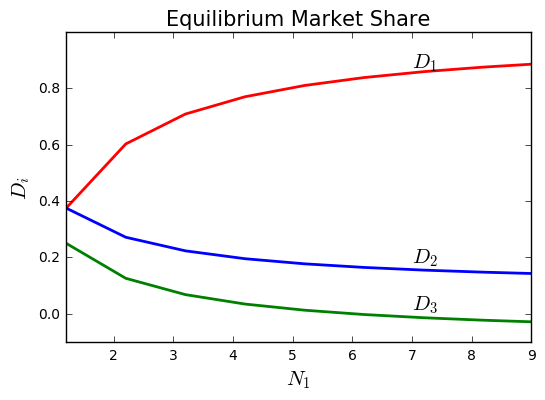

In [29]:
plt.clf()
plt.plot(range_N1, range_triopolyMS1,'-', color = 'r', linewidth = 2)
plt.plot(range_N1, range_triopolyMS2,'-', color = 'b', linewidth = 2)
plt.plot(range_N1, range_triopolyMS3,'-', color = 'g', linewidth = 2)
plt.title("Equilibrium Market Share",fontsize = 15)
plt.xlabel("$N_1$",fontsize = 15)
plt.ylabel("$D_i$",fontsize = 15,rotation = 90)
plt.annotate('$D_1$', xy=(7,triopolyMS1(8)),  xycoords='data', size = 15
             )
plt.annotate('$D_2$', xy=(7,triopolyMS2(5)),  xycoords='data', size = 15
             )
plt.annotate('$D_3$', xy=(7,triopolyMS3(5)),  xycoords='data', size = 15
             )

plt.xlim(1.2,9)
plt.ylim(-0.1,1,0.1)

### Duopoly case

Using the equations from the Appendix of the artcile for the Duopoly case, where each company maximizes the following function:

$$ \pi_i = \frac{x_i p}{x_1+x_2} - \frac {x_i}{N_i} - F $$
We plug in the following functions for the quality $x_i$:

$$ x_1 = \frac{N_1^2 N_2 p}{(N_2+N_1)^2)} $$

For Firm 2:
$$ x_2 = \frac {p N_1 N_2^2}{(N_2 + N_1)^2}$$

And for the Market share for each company $D_i$:

$$ D_1 = \frac {N_1}{ N_2+ N_1}$$

For Firm 2:
$$ D_2 = \frac {N_2}{N_2 + N_1}$$

The authors gave values to the parameters so that we can graph the quality and market shares: p=1 and $N_2$ = 1.

In [30]:
p=1.0
N2=1.0

def function1(N1):
    return (N1**2)*N2*p/((N2+N1)**2)
def function2(N1):
    return N1*p*(N2**2)/((N2+N1)**2)
def Marketshare1(N1):
    return N1/(N1+N2)
def Marketshare2 (N1):
    return N2/(N1+N2)

In order to graph how $x_i$ and $D_i$ change with $N_1$, we create a range for x and $N_1$ values:

In [31]:
range_N1 = arange(1.2,10,1)

range_x = arange(0.0,1,0.01)
range_function1 = [function1(N1) for N1 in range_N1]
range_function2 = [function2(N1) for N1 in range_N1]
range_Marketshare1 = [function1(N1) for N1 in range_N1]
range_Marketshare2 = [function2(N1) for N1 in range_N1]

Then we plot the graph of quality and how quality changes with the installed base $N_1$.

(0.0, 1)

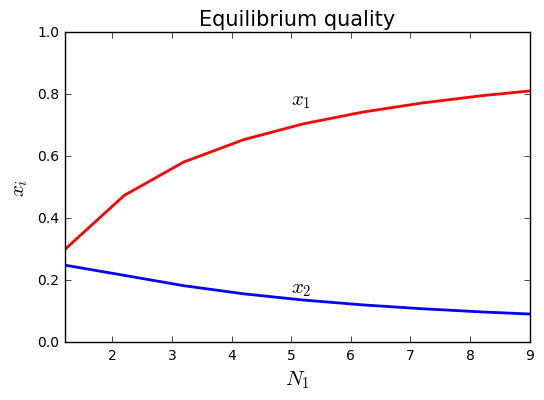

In [32]:
plt.clf()
plt.plot(range_N1, range_function1,'-', color = 'r', linewidth = 2)
plt.plot(range_N1, range_function2,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium quality",fontsize = 15)
plt.xlabel("$N_1$",fontsize = 15)
plt.ylabel("$x_i$",fontsize = 15,rotation = 90)
plt.annotate('$x_1$', xy=(5,function1(7)),  xycoords='data', size = 15
             )
plt.annotate('$x_2$', xy=(5,function2(4)),  xycoords='data', size = 15
             )
              

plt.xlim(1.2,9)
plt.ylim(0.0,1,0.1)


Then we graph the Market Share $D_i$ and how it changes with the installed base $N_1$. From the graph below we see that the market leader continues increasing its market shares at the expense of Firm 2. The authors predict taht the Duopoly model is not a stable equilibrium also and the makret leader will eventually become a monopoly, which is the only stable outcome for the search engine competition with network externalities model. 

(0.0, 1)

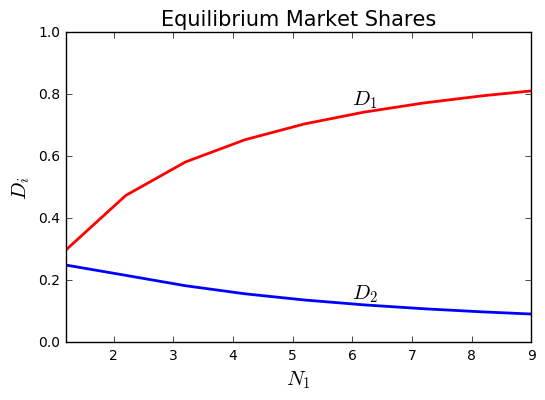

In [33]:
plt.clf()
plt.plot(range_N1, range_Marketshare1,'-', color = 'r', linewidth = 2)
plt.plot(range_N1, range_Marketshare2,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium Market Shares",fontsize = 15)
plt.xlabel("$N_1$",fontsize = 15)
plt.ylabel("$D_i$",fontsize = 15,rotation = 90)
plt.annotate('$D_1$', xy=(6,function1(7)),  xycoords='data', size = 15
             )
plt.annotate('$D_2$', xy=(6,function2(5)),  xycoords='data', size = 15
             )
              

plt.xlim(1.2,9)
plt.ylim(0.0,1,0.1)

### Using the model in the Social Media Market

In this part we will apply the model described above to the Social Media market. In the graph below, we present all firms in this market, and their market shares from 2011 - 2016. This graph has been created by Priit Kallas, and the original graph can be found [here](http://www.dreamgrow.com/top-10-social-networking-sites-market-share-of-visits/). In the graph, market share is defined as the percentage of users using the Social Media product. The y-axis is a logaritmic scale, since there are a lot of very small players in the market. 

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/TimGijsbers/AEA1/master/Total.png")

What we see if we look at the graph, is that there are three large players in 2008, Myspace, Youtube and Facebook. The other firms that are active in the Social Media market each have a market share of at most 2%, so we will ignore them for our analysis. What we are left with is effectively a Triopoly market. One firm that immediately catches attention is Myspace. The market share of this firm dropped very fast after 2008. In order to focus more on the behavior of the largest three players, we created a different graph. This graph is presented below, and shows only the three largest firms, from the period 2008 - 2011.

In [35]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/TimGijsbers/AEA1/master/2008.png")

You can look at these three firms as the triopoly case we described earlier. In this situation, we expect that one of the firms will recieve a lower and lower market share, while the other two firms expand. In the case of Facebook vs Myspace, this is quite comparable to the Search Engine market. Both firms offer a very comparable product, but the more people that use one brand, the more attractive it becomes. If all of your friends have a facebook account, you will probably see little reason to open up a Myspace account. As the model predicts, over time one of the firms will lose market share and eventually leave the market. 

Now we are left with two large players, Facebook and Youtube. The model predicts that one of them should lose market share over time, making the other one effectively a monopolist. To analyse this, we created another graph, this time showing only Facebook and Youtube, for the period 2012 - 2016.

In [36]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/TimGijsbers/AEA1/master/2016.png")

What we see in this graph contradicts the outcome of the model. Where we expected to find that one firm would take over the market, it seems that they are slowly converging over time. We believe that this is due to the different type of service that Facebook and Youtube offer. Where Myspace and Facebook offered an almost identical product, Facebook and Youtube offer different services. This makes it more likely that a user will use both products, but with a different purpose. We do not end up in a monopoly market structure, but in a structure with monopolistic competition.

### Conclusion



In this notebook, we first have shown how the model by[Jens Prüfer and Cedric Argenton](https://jensprufer.files.wordpress.com/2014/08/argenton-prufer-search-engine-competition_jcle.pdf) works. We have shown the examples of a Triopoly and Duopoly market, to illustrate the impact of Network effects on a cournot market.

After the introduction of the model, we compared the model to the Social Media market. We conclude that the Cournot model with network effects can be used as an approximation for the social media market. However, this only works as long as the services that the two firms provide are substitutes. If two firms offer an almost identical service (Myspace and Facebook), we expect one of them to leave the market over time. However, if the sevices provided differ (Facebook and Youtube), there is room for multiple firms in one market. In the latter case we end up with monopolistic competition, instead of a monopoly.

Specifically for the Social Media market, we find that firms provide hetrogenous products. We observe two large firms, Facebook and Youtube, who offer different services to their users. This allows users to make use of both Social Media, using them as complements instead of substitutes. Next to that we have a lot of smaller firms in the market, who operate in Niche markets. These firms have less that 2 percent market share each, and most of them offer a specific type of service. Over time you would expect most of the niche players to exit the market again, unless they can attract a large enough user base by offering a different product. If their product is too close to Facebook or Youtube (or even another niche player), we expect to see what the model predicts, that one firm exits the market after a few periods. 

We see no direct way of preventing Facebook and Youtube from maintaining their dominant position, unless you force them to cooperate with other Social Media firms.